In [44]:
# A Whale off the Port(folio)

In [94]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [95]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [96]:
#Counting nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [97]:
# Dropping nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [98]:
# Algorithmic Daily Returns

In [99]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [100]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [101]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [102]:
#S&P 500 Returns
#Reading the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [103]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [104]:
# Checking Data Types
sp500_history.dtypes

Close    object
dtype: object

In [105]:
# Fixing Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

/var/folders/vq/9ncg6r4s0f783smm__y4mpww0000gn/T/ipykernel_60207/4143053212.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [106]:
# Calculate Daily Returns & Dropping nulls
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [128]:
# Renaming `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

sp500_daily_returns.head()

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [129]:
## Combine Whale, Algorithmic, and S&P 500 Returns
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns",join = "inner")
combined_df = combined_df.dropna()
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [130]:
##Conduct Quantitative Analysis

<AxesSubplot:xlabel='Date'>

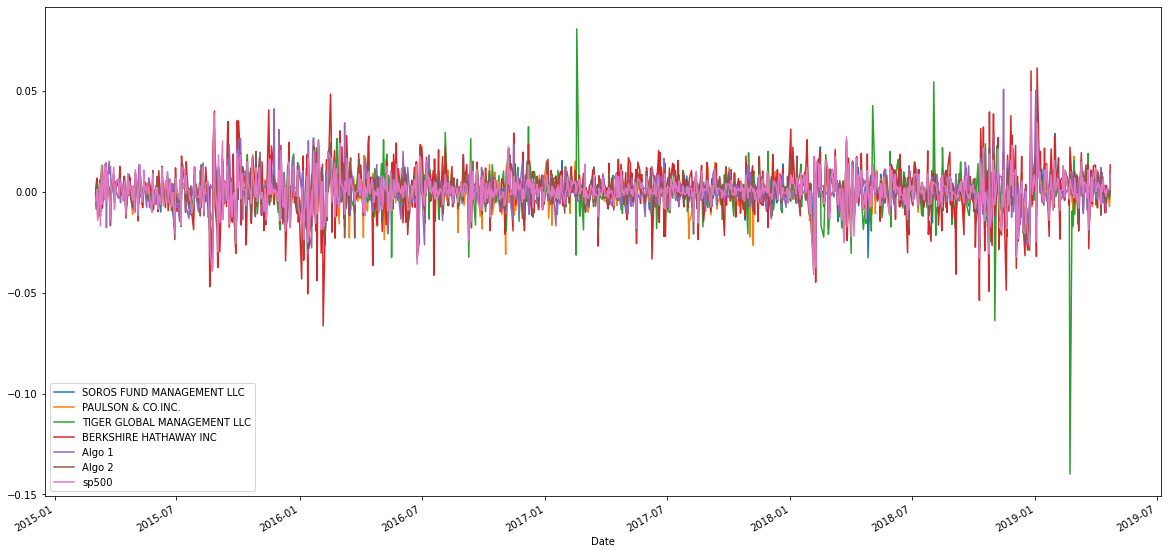

In [131]:
df_daily.plot(figsize = (20,10))

In [133]:
 #Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:xlabel='Date'>

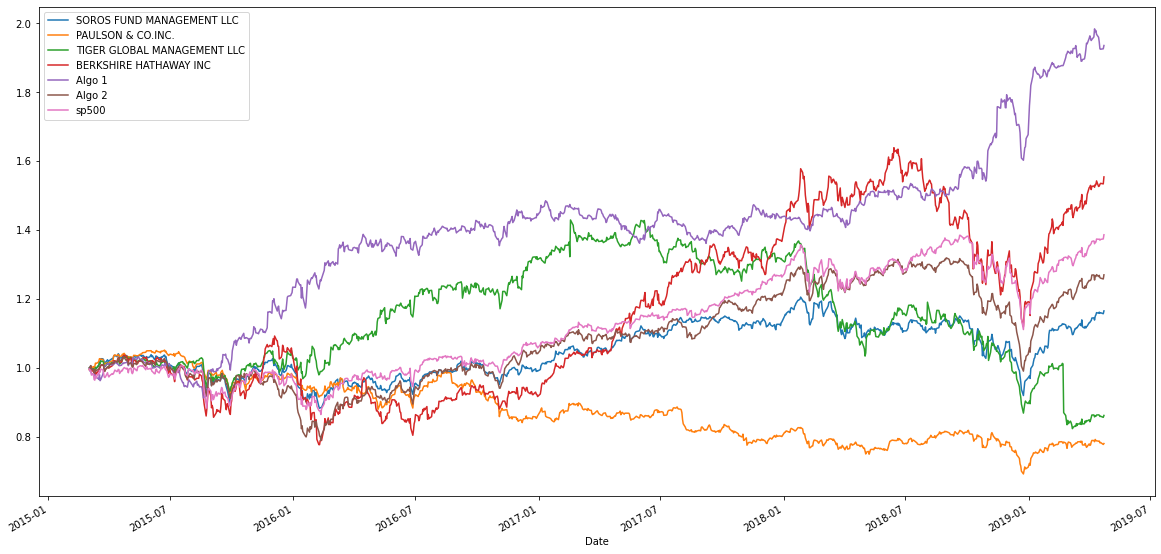

In [134]:
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

In [135]:
##Risk Analysis

<AxesSubplot:>

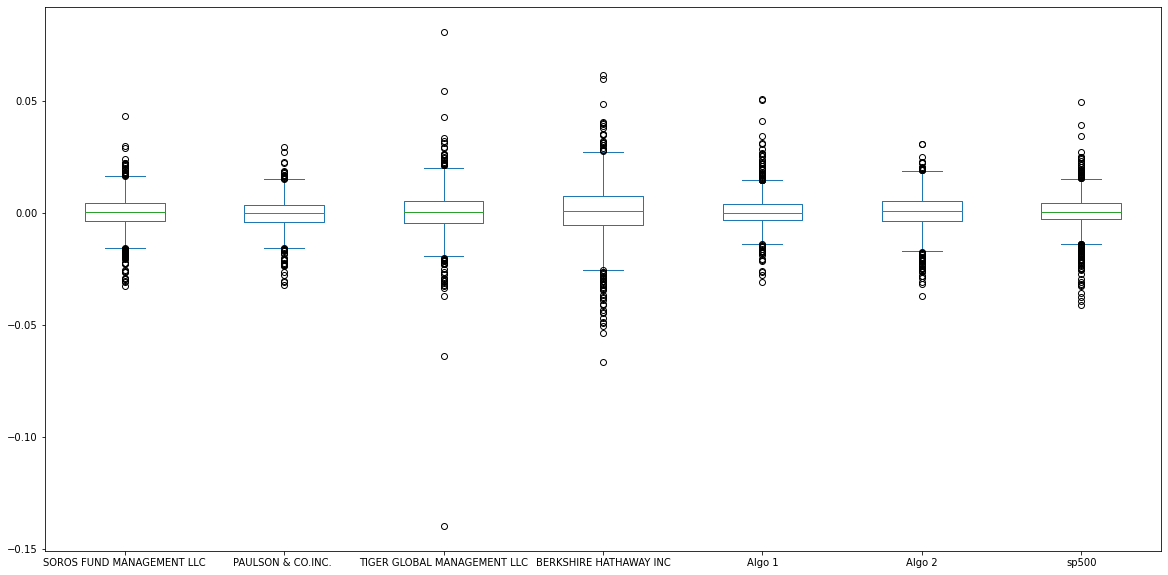

In [136]:
df_daily.plot(kind = "box", figsize = (20,10))

In [137]:
##Calculate Standard Deviations

In [148]:
#Calculating the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

In [149]:
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [152]:
# Calculate  the daily standard deviation of S&P 500
snp500_std = sp500_daily_returns.dropna().std()
snp500_std

sp500    0.008111
dtype: float64

In [156]:
risky_ports = combined_std.ge(snp500_std, level='sp500', fill_value= snp500_std['sp500'])
risky_ports = risky_ports.to_frame()
risky_ports.drop(index='sp500', inplace = True)
risky_ports = risky_ports.rename(columns={0:'Riskier'})
risky_ports

,Riskier
Algo 1,False
Algo 2,True
BERKSHIRE HATHAWAY INC,True
PAULSON & CO.INC.,False
SOROS FUND MANAGEMENT LLC,False
TIGER GLOBAL MANAGEMENT LLC,True


In [157]:
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [158]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


In [161]:
##Rolling Statistics.
#Calculate and plot rolling std for all portfolios with 21-da

In [163]:
all_rolling_21 = df_daily.rolling(window = 21).std().dropna()

all_rolling_21

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

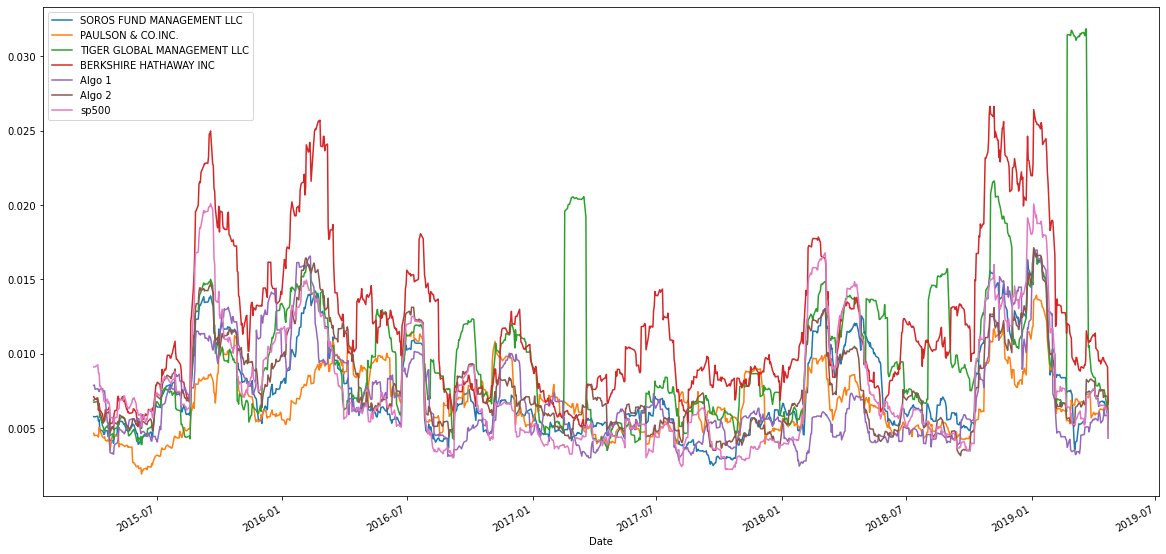

In [164]:
all_rolling_21.plot(figsize = (20,10))

In [173]:
# Calculate the correlation
price_corr = combined_df.corr()
# Display de correlation matrix
price_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [ ]:
 #Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

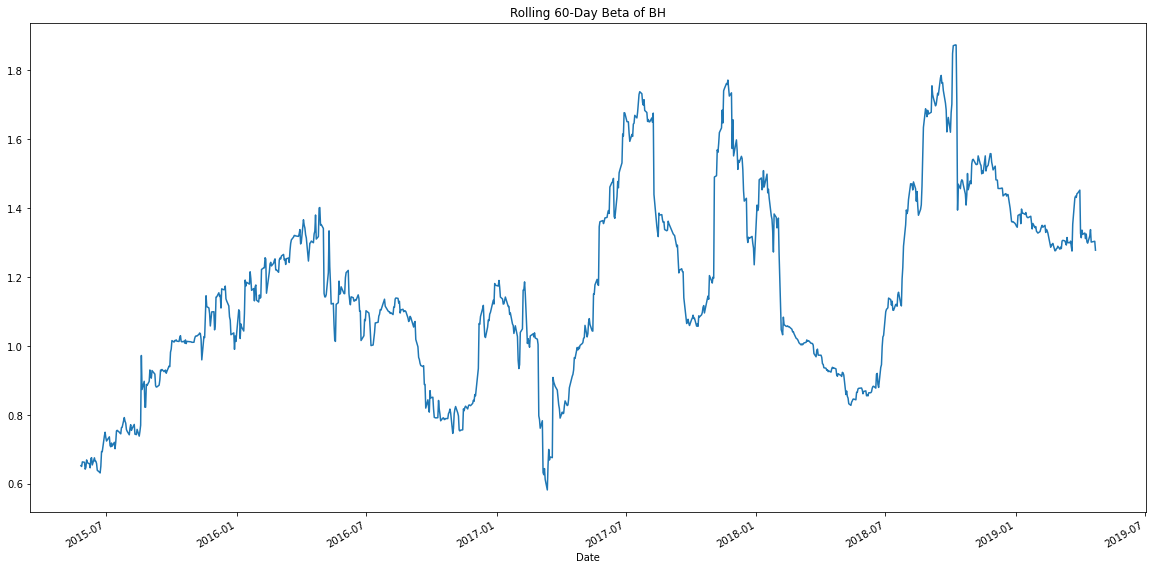

In [175]:
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

In [176]:
##Rolling Statistics Challenge: Exponentially Weighted Average


<AxesSubplot:xlabel='Date'>

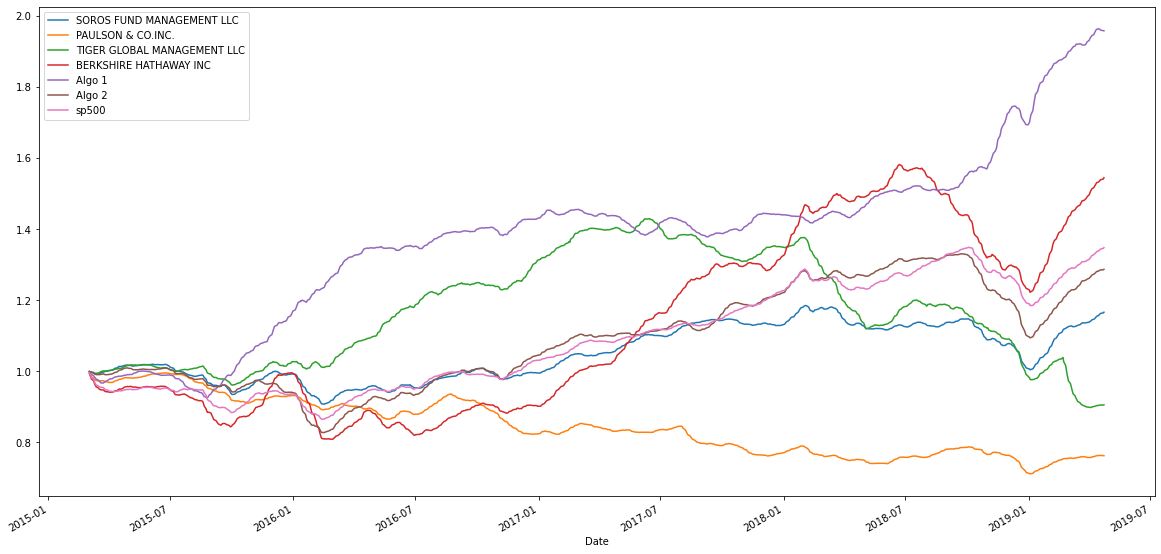

In [177]:
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

In [178]:
##Sharpe Ratios

In [179]:
# Annualzied Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

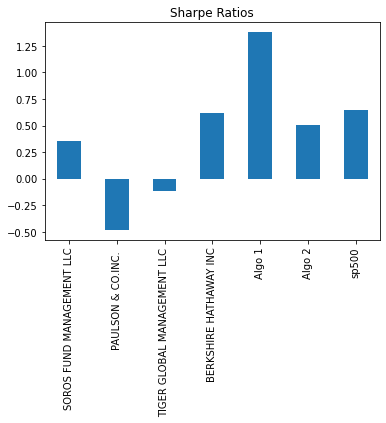

In [180]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

In [182]:
print('We see that the Algo 1 has the highest return, but the curve is smoother due to the moving average.')

We see that the Algo 1 has the highest return, but the curve is smoother due to the moving average.
